In [1]:
# Annual cycle of daily mean flux data 

In [1]:
import sys
import os, glob
import csv 
import calendar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import pandas as pd
from pyfunctions import *

In [9]:
# Load daily mean data
# set daytime SW threshold
sw_thresh = 0 # W/m2

df_ca3 = load_daily_data('CA-Ca3',sw_thresh)
df_me6 = load_daily_data('US-Me6',sw_thresh)
df_wref = load_daily_data('WREF',sw_thresh)
df_abby = load_daily_data('ABBY',sw_thresh)

### Plot annual Cycle

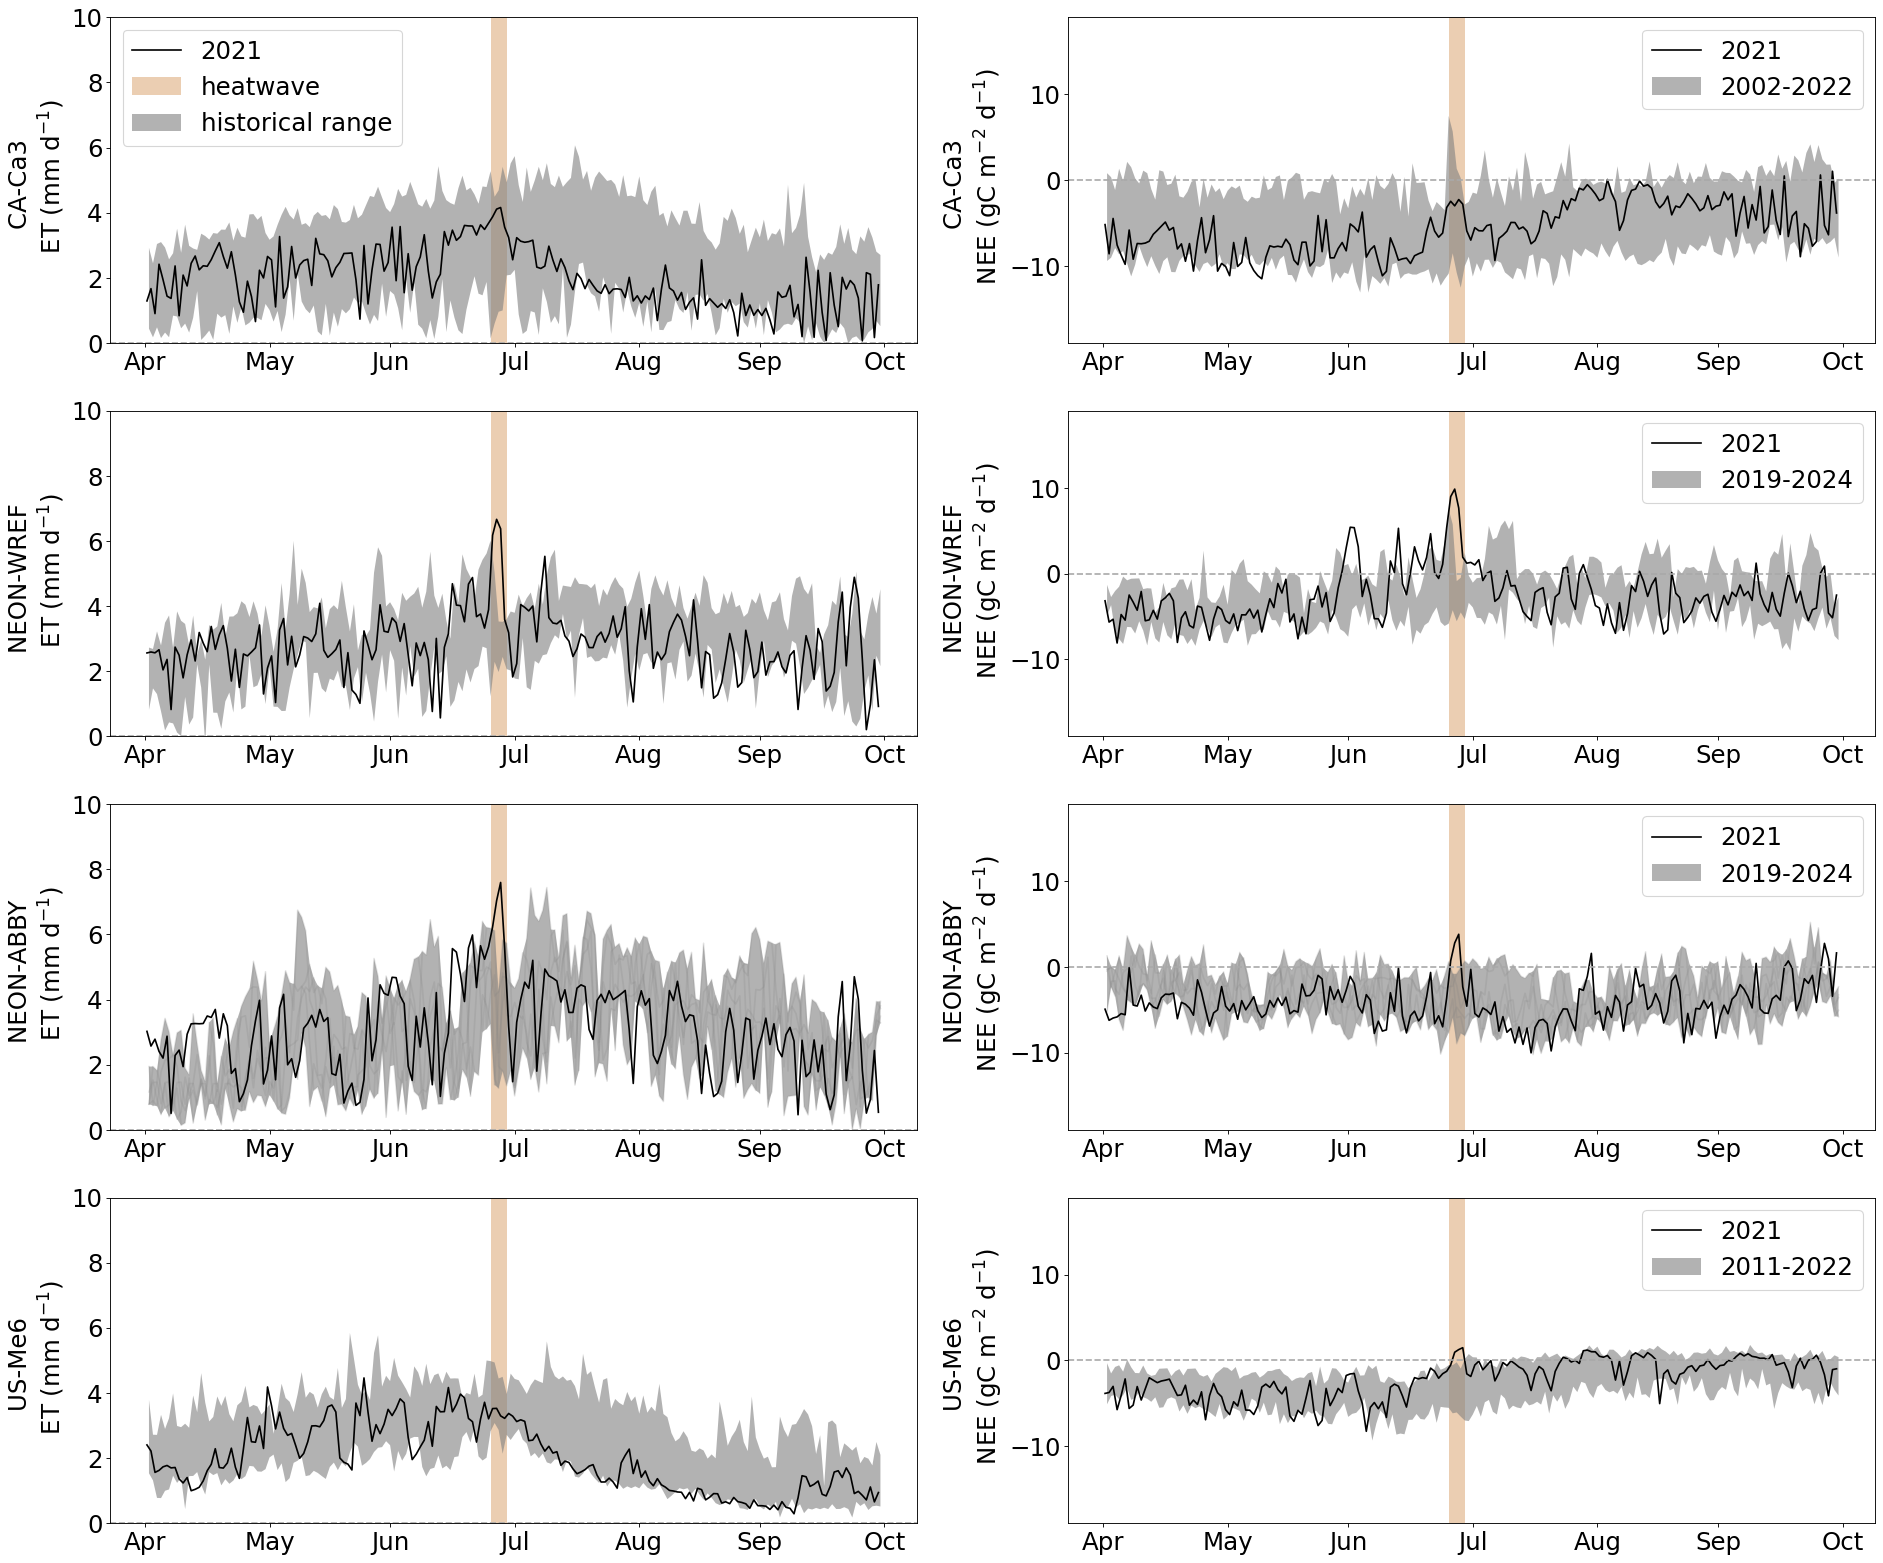

In [10]:
# plot
plt.figure(num=None, figsize=(24, 20), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0.15, hspace=0.15)
plt.rcParams.update({'font.size': 22})

nee_scaler = (1/1e6)*86400*12
lh_scaler = (1/2.45e6) * 86400

site_years = ['2002-2022','2019-2024','2019-2024','2011-2022']

x2 = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')
st = datetime(2021,4,1,0,0,0); en = datetime(2021,9,30,23,59,59)
x = pd.date_range(st,en,freq='D')
x1 = x - pd.Timedelta(hours=12)
dates = pd.date_range(start='2021-04-1', end='2021-11-2', freq='M')

# CA-Ca3
ax1 = plt.subplot(4,2,1)
var = ['LH']
tmp = df_ca3.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*lh_scaler

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(10,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_ca3[var][st:en]*lh_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([0,10])
ax1.set_ylabel('CA-Ca3 \n '+ r'ET (mm d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper left')
#plt.title(r'Latent Heat (W/m$^2$)')

ax1 = plt.subplot(4,2,2)
var = ['NEE']
tmp = df_ca3.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*nee_scaler

#ax1.plot(x,df_day_clim['day_mean'][st:en],c='k',linewidth=0.5,linestyle='--',label='Climatology')
ax1.fill_between(x2, np.tile(-20,len(x2)),np.tile(20,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[0])
ax1.plot(x1,df_ca3[var][st:en]*nee_scaler,color='k',linewidth=1.5,label='2021')
ax1.set_ylim([-19,19])
ax1.set_ylabel('CA-Ca3 \n '+ r'NEE (gC m$^{-2}$ d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')
#plt.title(r'NEE (umol/m$^2$/s)')

# NEON-WREF
ax1 = plt.subplot(4,2,3)
var = ['LH']
tmp = df_wref.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*lh_scaler

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(10,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_wref[var][st:en]*lh_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([0,10])
ax1.set_ylabel('NEON-WREF \n '+ r'ET (mm d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

ax1 = plt.subplot(4,2,4)
var = ['NEE']
tmp = df_wref.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*nee_scaler

#ax1.plot(x,df_day_clim['day_mean'][st:en],c='k',linewidth=0.5,linestyle='--',label='Climatology')
ax1.fill_between(x2, np.tile(-20,len(x2)),np.tile(20,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[1])
ax1.plot(x1,df_wref[var][st:en]*nee_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([-19,19])
ax1.set_ylabel('NEON-WREF \n '+ r'NEE (gC m$^{-2}$ d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')


# NEON-ABBY
ax1 = plt.subplot(4,2,5)
var = ['LH']
tmp = df_abby.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*lh_scaler
indyears = tmp['LH'].groupby([tmp['LH'].index.dayofyear, tmp['LH'].index.year]).max().unstack()

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(10,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey',alpha=0.6,label='historical range')
ax1.plot(x,indyears.iloc[91:274]*lh_scaler,color='grey',alpha=0.2)
ax1.plot(x1,df_abby[var][st:en]*lh_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([0,10])
ax1.set_ylabel('NEON-ABBY \n '+ r'ET (mm d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

plt.subplot(4,2,6)
var = ['NEE']
tmp = df_abby.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*nee_scaler
indyears = tmp[var].groupby([tmp[var].index.dayofyear, tmp[var].index.year]).max().unstack()

#ax1.plot(x,df_day_clim['day_mean'][st:en],c='k',linewidth=0.5,linestyle='--',label='Climatology')
plt.fill_between(x2, np.tile(-20,len(x2)),np.tile(20,len(x2)),facecolor='peru',alpha=0.4)
plt.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[2])
plt.plot(x,indyears.iloc[91:274]*nee_scaler,color='grey',alpha=0.2)
plt.plot(x1,df_abby[var][st:en].values*nee_scaler,label='2021',color='k',linewidth=1.5)
plt.ylim([-19,19])
plt.ylabel('NEON-ABBY \n '+ r'NEE (gC m$^{-2}$ d$^{-1}$)')
plt.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')

# US-Me6
ax1 = plt.subplot(4,2,7)
var = ['LH']
tmp = df_me6.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*lh_scaler

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(10,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_me6[var][st:en]*lh_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([0,10])
ax1.set_ylabel('US-Me6 \n '+ r'ET (mm d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

ax1 = plt.subplot(4,2,8)
var = ['NEE']
tmp = df_me6.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)*nee_scaler

#ax1.plot(x,df_day_clim['day_mean'][st:en],c='k',linewidth=0.5,linestyle='--',label='Climatology')
ax1.fill_between(x2, np.tile(-20,len(x2)),np.tile(20,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[3])
ax1.plot(x1,df_me6[var][st:en]*nee_scaler,label='2021',color='k',linewidth=1.5)
ax1.set_ylim([-19,19])
ax1.set_ylabel('US-Me6 \n '+ r'NEE (gC m$^{-2}$ d$^{-1}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')

plt.tight_layout()
#plt.savefig('../figs/timeseries_daytime50Wm2_LH+NEE.png',dpi=300)
plt.savefig('../figs/timeseries_daily24hour_LH+NEE.png',dpi=300)

### Rank years

In [18]:
from scipy.stats import percentileofscore

/Users/linniahawkins/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [39]:
df = df_me6.LH
ptile = []
for day in range(25,30):
    juneday = df[(df.index.month == 6) & (df.index.day == day)]
    juneday_2021 = juneday[juneday.index.year == 2021]
    ptile.append(percentileofscore(juneday.values, juneday_2021.values))
np.mean(ptile)

52.30769230769231

In [38]:
df = df_ca3.LH
ptile = []
for day in range(25,30):
    juneday = df[(df.index.month == 6) & (df.index.day == day)]
    juneday_2021 = juneday[juneday.index.year == 2021]
    ptile.append(percentileofscore(juneday.values, juneday_2021.values))
np.mean(ptile)

55.23809523809524

In [76]:
# rank monthly. sum of ET at US-Me6
monthly = df_me6['LH'].resample('M').sum()
jas = monthly[monthly.index.month.isin([7, 8, 9])]
jas_mean = jas.groupby(jas.index.year).mean()

# rank the years 
rank = jas_mean.rank(ascending=False)


### Check met before/after heatwave

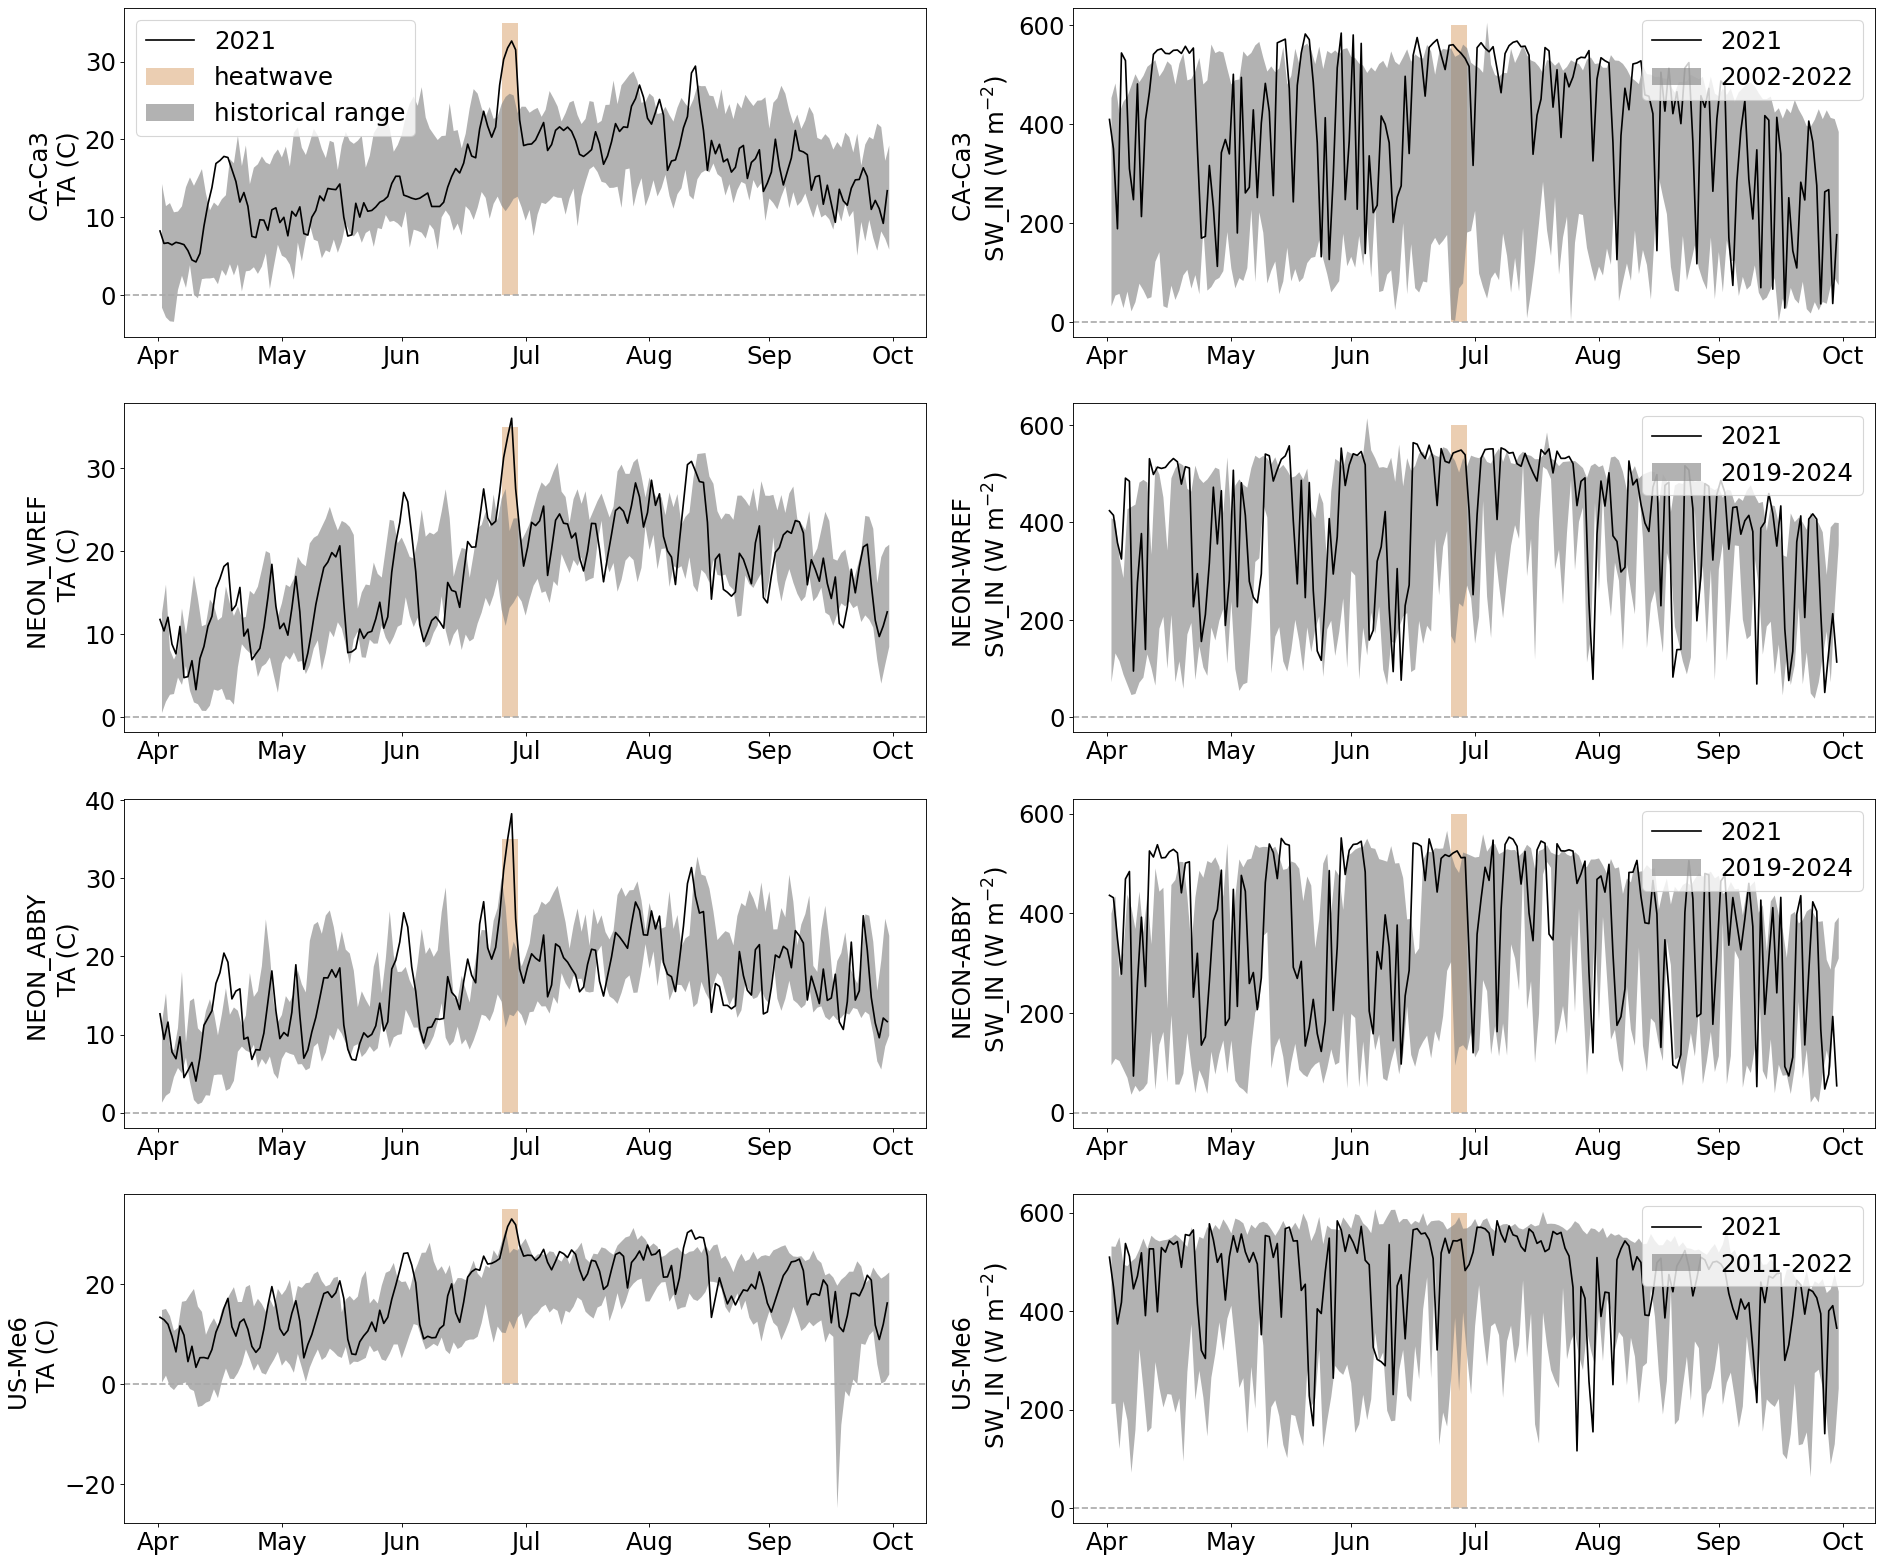

In [51]:
# NEE
plt.figure(num=None, figsize=(24, 20), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0.15, hspace=0.15)
plt.rcParams.update({'font.size': 22})

site_years = ['2002-2022','2019-2024','2019-2024','2011-2022']

x2 = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')
st = datetime(2021,4,1,0,0,0); en = datetime(2021,9,30,23,59,59)
x = pd.date_range(st,en,freq='D')
x1 = x - pd.Timedelta(hours=12)
dates = pd.date_range(start='2021-04-1', end='2021-11-2', freq='M')

# CA-Ca3
ax1 = plt.subplot(4,2,1)
var = ['TA']
tmp = df_ca3.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(35,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_ca3[var][st:en],label='2021',color='k',linewidth=1.5)
#ax1.set_ylim([0,10])
ax1.set_ylabel('CA-Ca3 \n '+ r'TA (C)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper left')

ax1 = plt.subplot(4,2,2)
var = ['SW_IN']
tmp = df_ca3.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(600,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[0])
ax1.plot(x1,df_ca3[var][st:en]*nee_scaler,color='k',linewidth=1.5,label='2021')
#ax1.set_ylim([-19,19])
ax1.set_ylabel('CA-Ca3 \n '+ r'SW_IN (W m$^{-2}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')

# WREF
ax1 = plt.subplot(4,2,3)
var = ['TA']
tmp = df_wref.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(35,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_wref[var][st:en],label='2021',color='k',linewidth=1.5)
#ax1.set_ylim([0,10])
ax1.set_ylabel('NEON_WREF \n '+ r'TA (C)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

ax1 = plt.subplot(4,2,4)
var = ['SW_IN']
tmp = df_wref.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(600,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[1])
ax1.plot(x1,df_wref[var][st:en]*nee_scaler,color='k',linewidth=1.5,label='2021')
#ax1.set_ylim([-19,19])
ax1.set_ylabel('NEON-WREF \n '+ r'SW_IN (W m$^{-2}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')

# ABBY
ax1 = plt.subplot(4,2,5)
var = ['TA']
tmp = df_abby.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(35,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_abby[var][st:en],label='2021',color='k',linewidth=1.5)
#ax1.set_ylim([0,10])
ax1.set_ylabel('NEON_ABBY \n '+ r'TA (C)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

ax1 = plt.subplot(4,2,6)
var = ['SW_IN']
tmp = df_abby.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(600,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[2])
ax1.plot(x1,df_abby[var][st:en]*nee_scaler,color='k',linewidth=1.5,label='2021')
#ax1.set_ylim([-19,19])
ax1.set_ylabel('NEON-ABBY \n '+ r'SW_IN (W m$^{-2}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')


# me6
ax1 = plt.subplot(4,2,7)
var = ['TA']
tmp = df_me6.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(35,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label='historical range')
ax1.plot(x1,df_me6[var][st:en],label='2021',color='k',linewidth=1.5)
#ax1.set_ylim([0,10])
ax1.set_ylabel('US-Me6 \n '+ r'TA (C)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])

ax1 = plt.subplot(4,2,8)
var = ['SW_IN']
tmp = df_me6.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,var)

ax1.fill_between(x2, np.tile(0,len(x2)),np.tile(600,len(x2)),facecolor='peru',alpha=0.4)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.6,label=site_years[3])
ax1.plot(x1,df_me6[var][st:en],color='k',linewidth=1.5,label='2021')
#ax1.set_ylim([-19,19])
ax1.set_ylabel('US-Me6 \n '+ r'SW_IN (W m$^{-2}$)')
ax1.axhline(linestyle='--',c='darkgrey')
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../figs/timeseries_daily24hour_TA_SW.png',dpi=300)